# 9. Определение исследовательских гипотез

In [1]:
import pandas as pd
df = pd.read_csv('data/Islander_data.csv')
df.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


In [2]:
exp_sample = df.sample(n=100)
exp_sample.value_counts('Drug')

Drug
T    36
S    34
A    30
dtype: int64

In [3]:
exp_sample = df.groupby('Drug').sample(30)
exp_sample.value_counts('Drug')

Drug
A    30
S    30
T    30
dtype: int64

C:\Users\anike\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


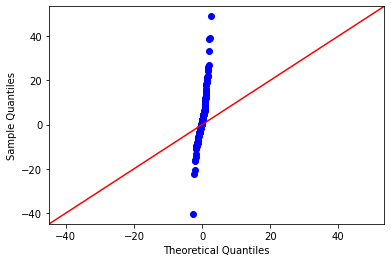

In [4]:
# Квантильный график

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
 
# normal_data = np.random.normal(0, 1, 1000)
# sm.qqplot(normal_data, line='45')
# plt.show()

sm.qqplot(df['Diff'], line='45')
plt.show()
# данные распределены неравномерно

### T-тест  -  значима ли разница средних между двумя группами

<AxesSubplot:title={'center':'Diff'}, xlabel='Happy_Sad_group'>

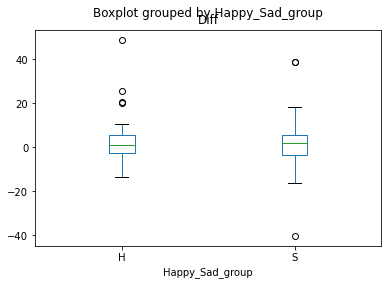

In [5]:
exp_sample.boxplot(by = 'Happy_Sad_group', 
                   column =['Diff'], 
                   grid = False)

# медианные значения у них примерно одинаковые и графически видно,
# что значимой разницы средних между группами не наблюдается

### ANOVA

Разница результатов теста на память в зависимости от групп принимаемого лекарства:
* препараты длительного приема (A);
* препараты кратковременного приема (T);
* плацебо (S).

<AxesSubplot:title={'center':'Diff'}, xlabel='Drug'>

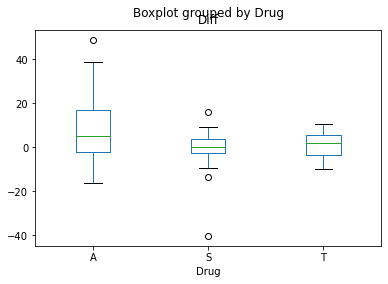

In [6]:
exp_sample.boxplot(by = 'Drug', column =['Diff'], grid = False)

### Хи-квадрат
Соотношения двух категориальных переменных (грустные и веселые мысли и группы дозировки): 
* 1 — маленькая дозировка
* 2 — средняя
* 3 — большая

(<Figure size 432x288 with 3 Axes>,
 {('1', 'H'): (0.0, 0.0, 0.341034103410341, 0.48226342299860675),
  ('1', 'S'): (0.0, 0.4855856821348194, 0.341034103410341, 0.5144143178651805),
  ('3', 'H'): (0.34598459845984597,
   0.0,
   0.27502750275027504,
   0.5581395348837209),
  ('3', 'S'): (0.34598459845984597,
   0.5614617940199336,
   0.27502750275027504,
   0.4385382059800664),
  ('2', 'H'): (0.625962596259626,
   0.0,
   0.37403740374037403,
   0.43971076802814146),
  ('2', 'S'): (0.625962596259626,
   0.4430330271643541,
   0.37403740374037403,
   0.5569669728356459)})

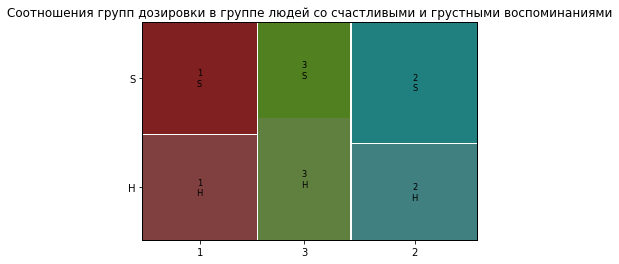

In [7]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(exp_sample, ['Dosage','Happy_Sad_group'], 
       title = 'Соотношения групп дозировки в группе людей со счастливыми и грустными воспоминаниями')

### Визуализация корреляции

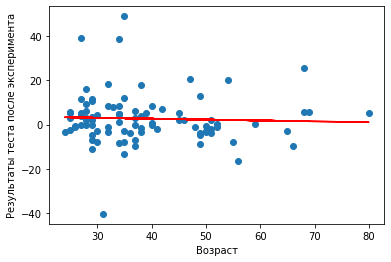

In [8]:
plt.scatter(exp_sample['age'], exp_sample['Diff'])
plt.xlabel('Возраст')
plt.ylabel('Результаты теста после эксперимента')

k, b = np.polyfit(exp_sample['age'], exp_sample['Diff'], 1)
plt.plot(exp_sample['age'], k * exp_sample['age'] + b, color='red')

# коэффициент корреляции между этими переменными близок к 0

In [9]:
np.corrcoef(exp_sample['age'], exp_sample['Diff'])[0, 1]

-0.04250318637300124

# Patient Survival After One Year of Treatment

In [10]:
import pandas as pd
df = pd.read_csv("data/Patient Survival.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,0,1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
1,1,2,16205,7,8608,DX6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
2,2,3,5582,31,10074,DX6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
3,3,6,17785,49,6663,DX5,5,23.882432,NO,RURAL,Stable,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1
4,4,8,11729,36,8098,DX6,43,22.182933,YES,RURAL,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0


In [11]:
exp_sample = df.sample(n = 500)
print(exp_sample.shape)

(500, 20)


In [12]:
exp_sample = df.groupby('Treated_with_drugs').sample(30)
col = ['Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker', 'Diagnosed_Condition', 'Survived_1_year']
exp_sample = exp_sample[col]
print(exp_sample.shape)

(60, 5)
